In [17]:
import torch
import torchvision

tabu1 = []
tabu2 = []

n_epochs = 10
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [18]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.FashionMNIST('./data', train=True, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.FashionMNIST('./data', train=False, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)


In [19]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.CIFAR100('./data', train=True, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.CIFAR100('./data', train=False, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)


In [20]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.CIFAR10('./data', train=True, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.49137255, 0.48235294, 0.44666667), (0.24705882, 0.24352941, 0.26156863))
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.CIFAR10('./data', train=False, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.49137255, 0.48235294, 0.44666667), (0.24705882, 0.24352941, 0.26156863))
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)


In [21]:

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.SVHN('./data', split='train', download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.SVHN('./data', split='test', download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

print(train_loader)
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)


Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat
torch.Size([64, 3, 32, 32])


In [22]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.MNIST('./data', train=True, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.MNIST('./data', train=False, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)


In [23]:
mean = 0.
std = 0.
nb_samples = 0.
for data, _ in train_loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

train_loader.dataset.transform = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 mean, std)
                             ])
test_loader.dataset.transform = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 mean, std)
                             ])


In [24]:
def initMatrix(size):
    ary = []
    for i in range(0, size):
        ary.append(1)
    return ary


In [25]:
from torch.nn.modules import Module
from torch.nn import functional as F
from torch._jit_internal import weak_module, weak_script_method

class Dropout(Module):
    def __init__(self, p=0.5, inplace=False):
        super(Dropout, self).__init__()
        if p < 0 or p > 1:
            raise ValueError("dropout probability has to be between 0 and 1, "
                             "but got {}".format(p))
        self.p = p
        self.inplace = inplace

    def forward(self, input):
        varTemp = F.dropout(input, self.p, self.training, self.inplace)
        return varTemp

    def __repr__(self):
        inplace_str = ', inplace' if self.inplace else ''
        return self.__class__.__name__ + '(' \
            + 'p=' + str(self.p) \
            + inplace_str + ')'
    
class MyLinear(torch.nn.Linear):
    def __init__(self, in_feats, out_feats, drop_p, t, bias=True):
        super(MyLinear, self).__init__(in_feats, out_feats, bias=bias)
        self.masker = Dropout(p=drop_p)
        self.tabu = t
        self.firstItr = True

    def forward(self, input):

        masked_weight = self.masker(self.weight)
        #print(masked_weight)
        output = F.linear(input, masked_weight, self.bias)
        
        # Here goes TABU
        if self.firstItr == True:
            
            self.firstItr = False
            for i in range(0, len(output[0])):
                if output[0][i] < 0:
                    # Neuron will be dropped
                    self.tabu[i] = 0
        else:
            temp_tabu = initMatrix(len(output[0])) 
            
            for i in range(0, len(output[0])):
                if output[0][i] < 0:
                    # Neuron will be dropped
                    temp_tabu[i] = 0
            for i in range(0, len(output[0])):
                if (self.tabu[i] == 0 and temp_tabu[i] == 0):
                    # Neuron will be dropped
                    self.tabu[i] = 1
                    output[0][i] = input[0][i]
                else:
                    self.tabu[i] = temp_tabu[i]
        
        return output
        

In [26]:
tabu1 = initMatrix(4096)
tabu2 = initMatrix(4096)
#tabu3 = initMatrix(512)

In [33]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
       
        # define the layers and their sizes, turn off bias
        self.fc1 = nn.Linear(3072, 4096)
        self.d1 = MyLinear(4096, 4096, 0.5, tabu1) #nn.Dropout(0.5) #      
        
        #self.d2 = nn.Dropout(0.5)
        #self.dT = MyLinear(1024, 1024, 0.5, tabu2) 
        #self.fc2 = nn.Linear(1024, 1024)
        #self.d2 = Dropout(0.05) 
        #self.fc3 = nn.Linear(1024, 1024)
        
        #For CIFAR-10
        #self.d3 = Dropout(0.3) 
        #self.fc3_1 = nn.Linear(512, 256)
        
        self.fc4 = nn.Linear(4096, 10)
        

    def forward(self, x):
        x = x.view(-1, 3072)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.d1(x))
        
        #x = F.relu(self.dT(x))
        #x = F.relu(self.fc2(x))
        
        #x = F.relu(self.d2(x))
        #x = F.relu(self.fc3(x))
        
        # for CIFAR-10
        #x = F.relu(self.d3(x))
        #x = F.relu(self.fc3_1(x))
        x = self.fc4(x)
        return F.log_softmax(x)

In [34]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate)

In [35]:
avg_train_loss = []
avg_train_counter = []
avg_test_loss = []
avg_test_counter = []
test_accuracy_list = []

test_losses = []
test_counter = []

epoch_number = 0
train_avg_loss = 0
test_avg_loss = 0

In [36]:
def train(epoch):
  
    train_losses = []
    train_counter = []
    
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            #torch.save(network.state_dict(), './results/mnist_with_tabu_model.pth')
            #torch.save(optimizer.state_dict(), './results/cifar10_with_tabu_optimizer.pth')
            #test(epoch, False)
            
    sum = 0.0
    for loss in train_losses:
        sum = sum + loss
    
    avg_train_loss.append(sum / len(train_losses))
    print("Average Training Loss: " + str(sum / len(train_losses)))

In [37]:
def test(epoch):
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
        #iterator = iter(test_loader)
        #data, target= iterator.next() 
        
            examples = enumerate(test_loader)
            batch_idx, (example_data, example_targets) = next(examples)  
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()

    test_loss /= len(test_loader.dataset)
    avg_test_loss.append(test_loss)
    test_counter.append((batch_idx*64) + ((epoch-1)*len(test_loader.dataset)))
    test_accuracy_list.append(100. * correct / len(test_loader.dataset))
    
    print('Test set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
   

In [38]:
#test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test(epoch)

/home/akash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/73257 (0%)]	Loss: 2.254278
Train Epoch: 1 [640/73257 (1%)]	Loss: 2.234840
Train Epoch: 1 [1280/73257 (2%)]	Loss: 2.249345
Train Epoch: 1 [1920/73257 (3%)]	Loss: 2.203706
Train Epoch: 1 [2560/73257 (3%)]	Loss: 2.263897
Train Epoch: 1 [3200/73257 (4%)]	Loss: 2.157626
Train Epoch: 1 [3840/73257 (5%)]	Loss: 2.356206
Train Epoch: 1 [4480/73257 (6%)]	Loss: 2.207246
Train Epoch: 1 [5120/73257 (7%)]	Loss: 2.238267
Train Epoch: 1 [5760/73257 (8%)]	Loss: 2.154390
Train Epoch: 1 [6400/73257 (9%)]	Loss: 2.163288
Train Epoch: 1 [7040/73257 (10%)]	Loss: 2.118665
Train Epoch: 1 [7680/73257 (10%)]	Loss: 2.210680
Train Epoch: 1 [8320/73257 (11%)]	Loss: 2.273038
Train Epoch: 1 [8960/73257 (12%)]	Loss: 2.171540
Train Epoch: 1 [9600/73257 (13%)]	Loss: 2.260474
Train Epoch: 1 [10240/73257 (14%)]	Loss: 2.212027
Train Epoch: 1 [10880/73257 (15%)]	Loss: 2.077279
Train Epoch: 1 [11520/73257 (16%)]	Loss: 2.189162
Train Epoch: 1 [12160/73257 (17%)]	Loss: 2.040607
Train Epoch: 1 [12800/73257 (17

/home/akash/anaconda3/lib/python3.7/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Avg. loss: 1.3134, Accuracy: 15375/26032 (59%)

Train Epoch: 2 [0/73257 (0%)]	Loss: 1.149077
Train Epoch: 2 [640/73257 (1%)]	Loss: 1.050785
Train Epoch: 2 [1280/73257 (2%)]	Loss: 1.177686
Train Epoch: 2 [1920/73257 (3%)]	Loss: 1.002874
Train Epoch: 2 [2560/73257 (3%)]	Loss: 1.276880
Train Epoch: 2 [3200/73257 (4%)]	Loss: 1.347007
Train Epoch: 2 [3840/73257 (5%)]	Loss: 1.245569
Train Epoch: 2 [4480/73257 (6%)]	Loss: 1.330359
Train Epoch: 2 [5120/73257 (7%)]	Loss: 1.311083
Train Epoch: 2 [5760/73257 (8%)]	Loss: 1.519926
Train Epoch: 2 [6400/73257 (9%)]	Loss: 1.103200
Train Epoch: 2 [7040/73257 (10%)]	Loss: 1.197118
Train Epoch: 2 [7680/73257 (10%)]	Loss: 1.234878
Train Epoch: 2 [8320/73257 (11%)]	Loss: 1.210804
Train Epoch: 2 [8960/73257 (12%)]	Loss: 1.084393
Train Epoch: 2 [9600/73257 (13%)]	Loss: 1.279549
Train Epoch: 2 [10240/73257 (14%)]	Loss: 1.021311
Train Epoch: 2 [10880/73257 (15%)]	Loss: 1.112190
Train Epoch: 2 [11520/73257 (16%)]	Loss: 1.198652
Train Epoch: 2 [12160/7

Train Epoch: 3 [30080/73257 (41%)]	Loss: 0.767791
Train Epoch: 3 [30720/73257 (42%)]	Loss: 1.075875
Train Epoch: 3 [31360/73257 (43%)]	Loss: 0.903147
Train Epoch: 3 [32000/73257 (44%)]	Loss: 0.917445
Train Epoch: 3 [32640/73257 (45%)]	Loss: 1.100935
Train Epoch: 3 [33280/73257 (45%)]	Loss: 1.081400
Train Epoch: 3 [33920/73257 (46%)]	Loss: 0.746793
Train Epoch: 3 [34560/73257 (47%)]	Loss: 0.724765
Train Epoch: 3 [35200/73257 (48%)]	Loss: 0.756405
Train Epoch: 3 [35840/73257 (49%)]	Loss: 0.797944
Train Epoch: 3 [36480/73257 (50%)]	Loss: 0.940836
Train Epoch: 3 [37120/73257 (51%)]	Loss: 0.673736
Train Epoch: 3 [37760/73257 (52%)]	Loss: 0.847765
Train Epoch: 3 [38400/73257 (52%)]	Loss: 0.822564
Train Epoch: 3 [39040/73257 (53%)]	Loss: 0.700544
Train Epoch: 3 [39680/73257 (54%)]	Loss: 0.950754
Train Epoch: 3 [40320/73257 (55%)]	Loss: 1.064529
Train Epoch: 3 [40960/73257 (56%)]	Loss: 0.944371
Train Epoch: 3 [41600/73257 (57%)]	Loss: 0.852273
Train Epoch: 3 [42240/73257 (58%)]	Loss: 0.972757


Train Epoch: 4 [60800/73257 (83%)]	Loss: 0.687872
Train Epoch: 4 [61440/73257 (84%)]	Loss: 0.751456
Train Epoch: 4 [62080/73257 (85%)]	Loss: 1.151743
Train Epoch: 4 [62720/73257 (86%)]	Loss: 0.517968
Train Epoch: 4 [63360/73257 (86%)]	Loss: 0.958349
Train Epoch: 4 [64000/73257 (87%)]	Loss: 0.702663
Train Epoch: 4 [64640/73257 (88%)]	Loss: 0.967738
Train Epoch: 4 [65280/73257 (89%)]	Loss: 0.809594
Train Epoch: 4 [65920/73257 (90%)]	Loss: 0.592463
Train Epoch: 4 [66560/73257 (91%)]	Loss: 0.703490
Train Epoch: 4 [67200/73257 (92%)]	Loss: 0.990674
Train Epoch: 4 [67840/73257 (93%)]	Loss: 0.827245
Train Epoch: 4 [68480/73257 (93%)]	Loss: 0.644015
Train Epoch: 4 [69120/73257 (94%)]	Loss: 0.806785
Train Epoch: 4 [69760/73257 (95%)]	Loss: 0.885805
Train Epoch: 4 [70400/73257 (96%)]	Loss: 0.600592
Train Epoch: 4 [71040/73257 (97%)]	Loss: 0.799166
Train Epoch: 4 [71680/73257 (98%)]	Loss: 0.654190
Train Epoch: 4 [72320/73257 (99%)]	Loss: 0.972783
Train Epoch: 4 [72960/73257 (100%)]	Loss: 0.700643

Train Epoch: 6 [17280/73257 (24%)]	Loss: 0.823133
Train Epoch: 6 [17920/73257 (24%)]	Loss: 0.551751
Train Epoch: 6 [18560/73257 (25%)]	Loss: 0.711786
Train Epoch: 6 [19200/73257 (26%)]	Loss: 0.702550
Train Epoch: 6 [19840/73257 (27%)]	Loss: 0.748499
Train Epoch: 6 [20480/73257 (28%)]	Loss: 0.665096
Train Epoch: 6 [21120/73257 (29%)]	Loss: 0.780825
Train Epoch: 6 [21760/73257 (30%)]	Loss: 0.492977
Train Epoch: 6 [22400/73257 (31%)]	Loss: 0.636787
Train Epoch: 6 [23040/73257 (31%)]	Loss: 0.927425
Train Epoch: 6 [23680/73257 (32%)]	Loss: 0.809250
Train Epoch: 6 [24320/73257 (33%)]	Loss: 0.449395
Train Epoch: 6 [24960/73257 (34%)]	Loss: 0.471873
Train Epoch: 6 [25600/73257 (35%)]	Loss: 0.718480
Train Epoch: 6 [26240/73257 (36%)]	Loss: 0.765760
Train Epoch: 6 [26880/73257 (37%)]	Loss: 0.588624
Train Epoch: 6 [27520/73257 (38%)]	Loss: 0.660294
Train Epoch: 6 [28160/73257 (38%)]	Loss: 0.541865
Train Epoch: 6 [28800/73257 (39%)]	Loss: 0.557857
Train Epoch: 6 [29440/73257 (40%)]	Loss: 0.799881


Train Epoch: 7 [48000/73257 (66%)]	Loss: 0.591801
Train Epoch: 7 [48640/73257 (66%)]	Loss: 0.601991
Train Epoch: 7 [49280/73257 (67%)]	Loss: 0.503513
Train Epoch: 7 [49920/73257 (68%)]	Loss: 0.522798
Train Epoch: 7 [50560/73257 (69%)]	Loss: 0.668222
Train Epoch: 7 [51200/73257 (70%)]	Loss: 0.530559
Train Epoch: 7 [51840/73257 (71%)]	Loss: 0.515664
Train Epoch: 7 [52480/73257 (72%)]	Loss: 0.714244
Train Epoch: 7 [53120/73257 (72%)]	Loss: 0.579120
Train Epoch: 7 [53760/73257 (73%)]	Loss: 0.597394
Train Epoch: 7 [54400/73257 (74%)]	Loss: 0.540027
Train Epoch: 7 [55040/73257 (75%)]	Loss: 0.404424
Train Epoch: 7 [55680/73257 (76%)]	Loss: 0.450090
Train Epoch: 7 [56320/73257 (77%)]	Loss: 0.558423
Train Epoch: 7 [56960/73257 (78%)]	Loss: 0.481089
Train Epoch: 7 [57600/73257 (79%)]	Loss: 0.573402
Train Epoch: 7 [58240/73257 (79%)]	Loss: 0.911410
Train Epoch: 7 [58880/73257 (80%)]	Loss: 0.695108
Train Epoch: 7 [59520/73257 (81%)]	Loss: 0.886556
Train Epoch: 7 [60160/73257 (82%)]	Loss: 0.600484


Train Epoch: 9 [3840/73257 (5%)]	Loss: 0.453069
Train Epoch: 9 [4480/73257 (6%)]	Loss: 0.661082
Train Epoch: 9 [5120/73257 (7%)]	Loss: 0.489871
Train Epoch: 9 [5760/73257 (8%)]	Loss: 0.446709
Train Epoch: 9 [6400/73257 (9%)]	Loss: 0.594913
Train Epoch: 9 [7040/73257 (10%)]	Loss: 0.539837
Train Epoch: 9 [7680/73257 (10%)]	Loss: 0.475947
Train Epoch: 9 [8320/73257 (11%)]	Loss: 0.556769
Train Epoch: 9 [8960/73257 (12%)]	Loss: 0.610344
Train Epoch: 9 [9600/73257 (13%)]	Loss: 0.643060
Train Epoch: 9 [10240/73257 (14%)]	Loss: 0.612870
Train Epoch: 9 [10880/73257 (15%)]	Loss: 0.529511
Train Epoch: 9 [11520/73257 (16%)]	Loss: 0.636460
Train Epoch: 9 [12160/73257 (17%)]	Loss: 0.631211
Train Epoch: 9 [12800/73257 (17%)]	Loss: 0.646504
Train Epoch: 9 [13440/73257 (18%)]	Loss: 0.461687
Train Epoch: 9 [14080/73257 (19%)]	Loss: 0.596329
Train Epoch: 9 [14720/73257 (20%)]	Loss: 0.434009
Train Epoch: 9 [15360/73257 (21%)]	Loss: 0.607690
Train Epoch: 9 [16000/73257 (22%)]	Loss: 0.465467
Train Epoch: 9 

Train Epoch: 10 [33920/73257 (46%)]	Loss: 0.402996
Train Epoch: 10 [34560/73257 (47%)]	Loss: 0.722547
Train Epoch: 10 [35200/73257 (48%)]	Loss: 0.468573
Train Epoch: 10 [35840/73257 (49%)]	Loss: 0.660608
Train Epoch: 10 [36480/73257 (50%)]	Loss: 0.582652
Train Epoch: 10 [37120/73257 (51%)]	Loss: 0.580144
Train Epoch: 10 [37760/73257 (52%)]	Loss: 0.532027
Train Epoch: 10 [38400/73257 (52%)]	Loss: 0.558228
Train Epoch: 10 [39040/73257 (53%)]	Loss: 0.485688
Train Epoch: 10 [39680/73257 (54%)]	Loss: 0.348140
Train Epoch: 10 [40320/73257 (55%)]	Loss: 0.332094
Train Epoch: 10 [40960/73257 (56%)]	Loss: 0.563154
Train Epoch: 10 [41600/73257 (57%)]	Loss: 0.555986
Train Epoch: 10 [42240/73257 (58%)]	Loss: 0.524288
Train Epoch: 10 [42880/73257 (59%)]	Loss: 0.544954
Train Epoch: 10 [43520/73257 (59%)]	Loss: 0.595812
Train Epoch: 10 [44160/73257 (60%)]	Loss: 0.586415
Train Epoch: 10 [44800/73257 (61%)]	Loss: 0.433796
Train Epoch: 10 [45440/73257 (62%)]	Loss: 0.259828
Train Epoch: 10 [46080/73257 (6

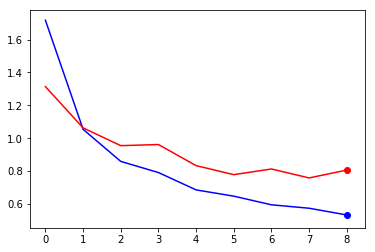

In [44]:
import matplotlib.pyplot as plt

fig = plt.figure()

final_train_counter = []
final_train_losses = []
final_test_counter = []
final_test_losses = []

for i in range(0, n_epochs):
    final_train_counter.append(i)
"""
for i in range(0, len(avg_train_loss)-1, 30):
    index = int(i/10)
    final_train_counter.append(train_counter[i])
    final_train_losses.append((train_losses[i] + train_losses[i+1]) / 2)
    final_test_counter.append(train_counter[i])
    final_test_losses.append((test_losses[i] + test_losses[i+1]) / 2)

final_train_counter.append(train_counter[len(train_counter)-1]) 
final_train_losses.append(train_losses[len(train_counter)-1])
final_test_counter.append(train_counter[len(train_counter)-1])
final_test_losses.append(test_losses[len(train_counter)-1])    
    
plt.plot(len(avg_train_loss), avg_train_loss, color='blue')
plt.scatter(avg_train_loss[-1], avg_train_loss[-1], color='blue')
plt.plot(len(avg_test_losses), avg_test_losses, color='red')
plt.scatter(avg_test_losses[-1], avg_test_losses[-1], color='red')

# print(len(test_counter))
# print(len(test_losses))

plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
"""

final_avg_train_loss = []
final_avg_test_loss = []
u_final_train_counter = []


for i in range(0, len(avg_train_loss)-1):
    final_avg_train_loss.append(avg_train_loss[i])
    final_avg_test_loss.append(avg_test_loss[i])
    u_final_train_counter.append(final_train_counter[i])

plt.plot(u_final_train_counter, final_avg_train_loss, color='blue')
plt.scatter(u_final_train_counter[-1], final_avg_train_loss[-1], color='blue')
plt.plot(u_final_train_counter, final_avg_test_loss, color='red')
plt.scatter(u_final_train_counter[-1], final_avg_test_loss[-1], color='red')
# plt.plot(final_train_counter, test_accuracy_list, color='orange')

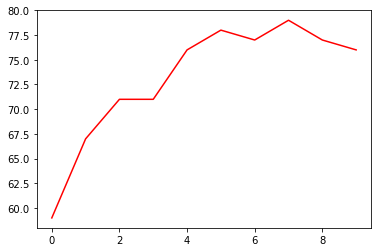

In [48]:
import matplotlib.pyplot as plt

fig = plt.figure()

last_acc = []
last_counter = []
index = 0
for acc in range(0, len(test_accuracy_list)) :
    last_acc.append(test_accuracy_list[acc])
    last_counter.append(final_train_counter[index])
    index = index + 1

plt.plot(last_counter, last_acc, color='red')



In [49]:
import matplotlib.pyplot as plt
import plotter

acc1 = plotter.SavedAccuracy(name='svhn_tabu_acc.pkl')
acc1.saveGraph(last_acc, last_counter)
#a, c = acc1.loadGraph()
#plt.plot(c, a, color='red')


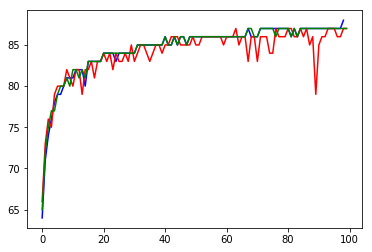

/home/akash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


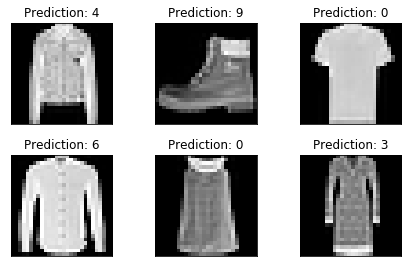

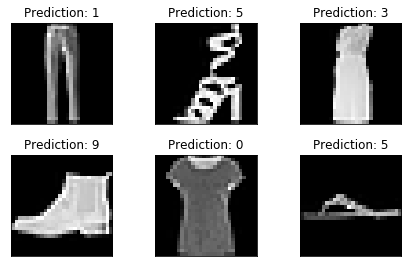

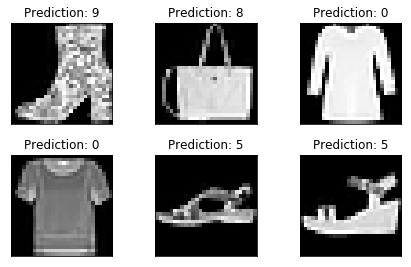

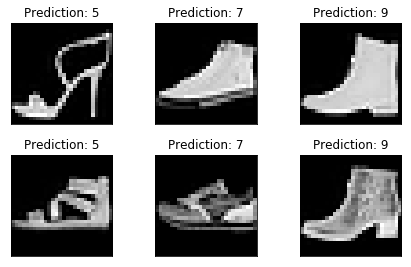

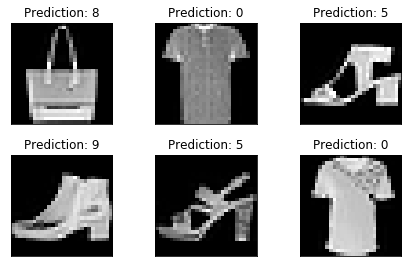

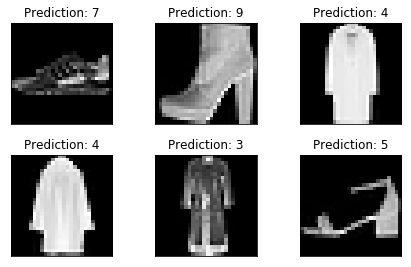

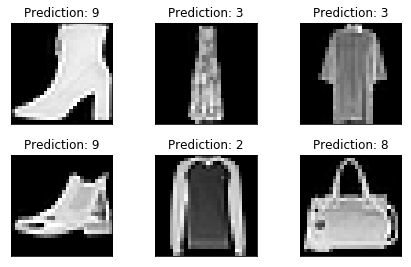

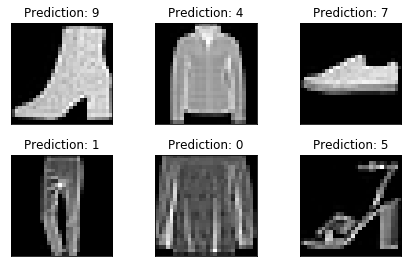

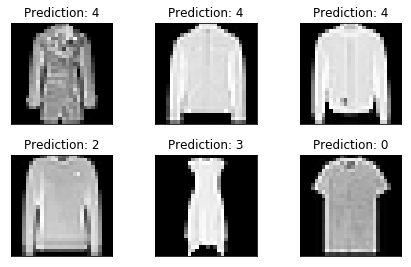

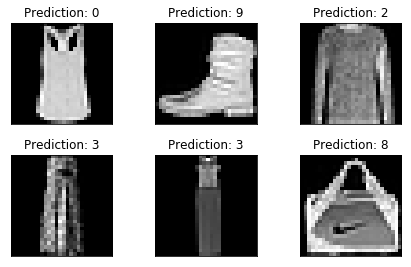

In [99]:
def makeCifar10Dec(param):
    if param == 0:
        return "airplane"
    elif param == 1:
        return "automobile"
    elif param == 2:
        return "bird"
    elif param == 3:
        return "cat"
    elif param == 4:
        return "deer"
    elif param == 5:
        return "dog"
    elif param == 6:
        return "frog"
    elif param == 7:
        return "horse"
    elif param == 8:
        return "ship"
    elif param == 9:
        return "truck"
    

examples = enumerate(test_loader)
for i in range(0, 10):
    batch_idx, (example_data, example_targets) = next(examples)
  
    with torch.no_grad():
        output = network(example_data)

        fig = plt.figure()
        for i in range(6):
            plt.subplot(2,3,i+1)
            plt.tight_layout()
            plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
            plt.title("Prediction: {}".format(
                output.data.max(1, keepdim=True)[1][i].item()))
            plt.xticks([])
            plt.yticks([])


In [0]:
# Reloading a already saved model
'''
import matplotlib.pyplot as plt

continued_network = Net()
continued_optimizer = optim.SGD(continued_network.parameters(), lr=learning_rate,
                                momentum=momentum)

network_state_dict = torch.load('./results/model.pth')
continued_network.load_state_dict(network_state_dict)

optimizer_state_dict = torch.load('./results/optimizer.pth')
continued_optimizer.load_state_dict(optimizer_state_dict)

examples = enumerate(test_loader)
for i in range(0, 2):
    batch_idx, (example_data, example_targets) = next(examples)

    with torch.no_grad():
        output = continued_network(example_data)

        fig = plt.figure()
        for i in range(6):
            plt.subplot(2,3,i+1)
            plt.tight_layout()
            plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
            plt.title("Prediction: {}".format(
                output.data.max(1, keepdim=True)[1][i].item()))
            
            plt.xticks([])
            plt.yticks([])
            
'''